In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
df = pd.read_csv('Brooklyn_Bridge_Automated_Pedestrian_Counts_Demonstration_Project_20251014.csv')

In [74]:
df.head()

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1
0,2019 Apr 30 12:00:00 AM,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
1,2019 Dec 31 10:00:00 PM,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
2,2019 Dec 31 11:00:00 PM,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
3,2019 Dec 31 09:00:00 PM,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
4,2019 Apr 01 03:00:00 AM,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16057 entries, 0 to 16056
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hour_beginning     16057 non-null  object 
 1   location           16057 non-null  object 
 2   Pedestrians        16057 non-null  object 
 3   Towards Manhattan  16057 non-null  object 
 4   Towards Brooklyn   16057 non-null  object 
 5   weather_summary    16041 non-null  object 
 6   temperature        16041 non-null  float64
 7   precipitation      16041 non-null  float64
 8   lat                16057 non-null  float64
 9   long               16057 non-null  float64
 10  events             1124 non-null   object 
 11  Location1          16057 non-null  object 
dtypes: float64(4), object(8)
memory usage: 1.5+ MB


In [76]:
df['weather_summary'] = df['weather_summary'].fillna(method='ffill')
df['temperature'] = df['temperature'].fillna(method='ffill')
df['precipitation'] = df['precipitation'].fillna(method='ffill')

/var/folders/jq/y2kzd93d76jbj3szdx797mkh0000gn/T/ipykernel_52512/423979917.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['weather_summary'] = df['weather_summary'].fillna(method='ffill')
/var/folders/jq/y2kzd93d76jbj3szdx797mkh0000gn/T/ipykernel_52512/423979917.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['temperature'] = df['temperature'].fillna(method='ffill')
/var/folders/jq/y2kzd93d76jbj3szdx797mkh0000gn/T/ipykernel_52512/423979917.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['precipitation'] = df['precipitation'].fillna(method='ffill')


In [77]:
df['Pedestrians'] = pd.to_numeric(df['Pedestrians'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16057 entries, 0 to 16056
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hour_beginning     16057 non-null  object 
 1   location           16057 non-null  object 
 2   Pedestrians        11321 non-null  float64
 3   Towards Manhattan  16057 non-null  object 
 4   Towards Brooklyn   16057 non-null  object 
 5   weather_summary    16056 non-null  object 
 6   temperature        16056 non-null  float64
 7   precipitation      16056 non-null  float64
 8   lat                16057 non-null  float64
 9   long               16057 non-null  float64
 10  events             1124 non-null   object 
 11  Location1          16057 non-null  object 
dtypes: float64(5), object(7)
memory usage: 1.5+ MB


/var/folders/jq/y2kzd93d76jbj3szdx797mkh0000gn/T/ipykernel_52512/1105526950.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])


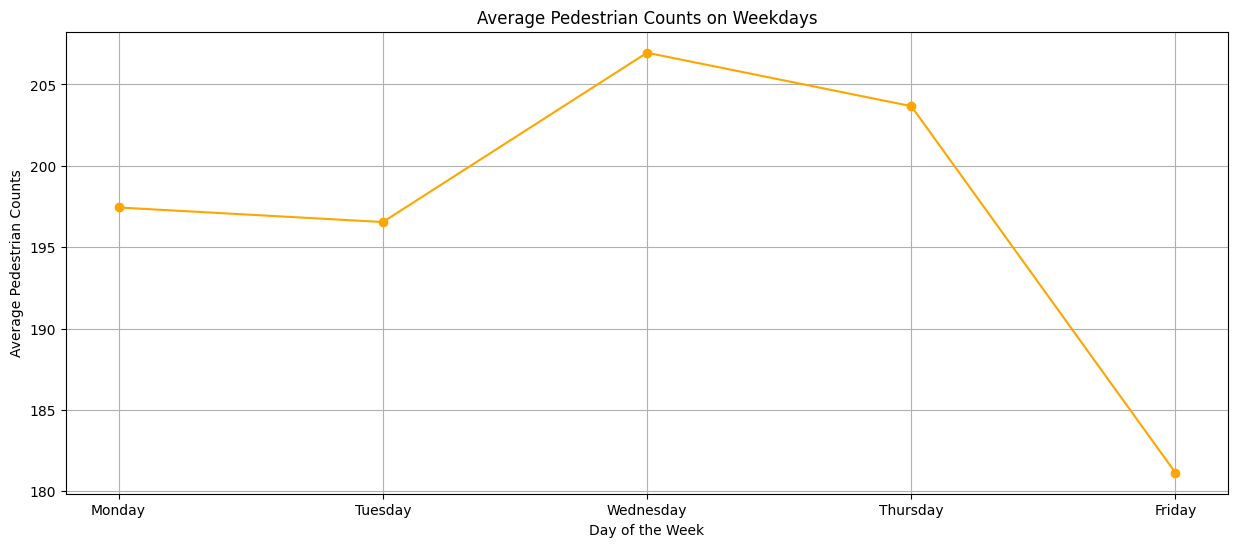

In [78]:
# Filter the data to include only weekdays (Monday to Friday) and plot a line graph showing the pedestrian counts for each day of the week.

df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])
df['hour'] = df['hour_beginning'].dt.hour
df['month'] = df['hour_beginning'].dt.month
df['date'] = df['hour_beginning'].dt.date
df['day_name'] = df['hour_beginning'].dt.day_name()

# create a new dataframe for weekdays only
weekdays_df = df[df['day_name'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]

# group by day and average pedestrian counts
weekday_counts = weekdays_df.groupby('day_name').agg(average = ('Pedestrians', 'mean')).reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])

# plot the line graph
plt.figure(figsize=(15,6))
plt.plot(weekday_counts.index, weekday_counts['average'], marker='o', color='orange')
plt.title('Average Pedestrian Counts on Weekdays')
plt.xlabel('Day of the Week')
plt.ylabel('Average Pedestrian Counts')
plt.grid()
plt.show()


In [79]:
df['weather_summary'].unique()

array([nan, 'cloudy', 'clear-night', 'clear-day', 'partly-cloudy-night',
       'partly-cloudy-day', 'fog', 'rain', 'sleet', 'snow', 'wind'],
      dtype=object)

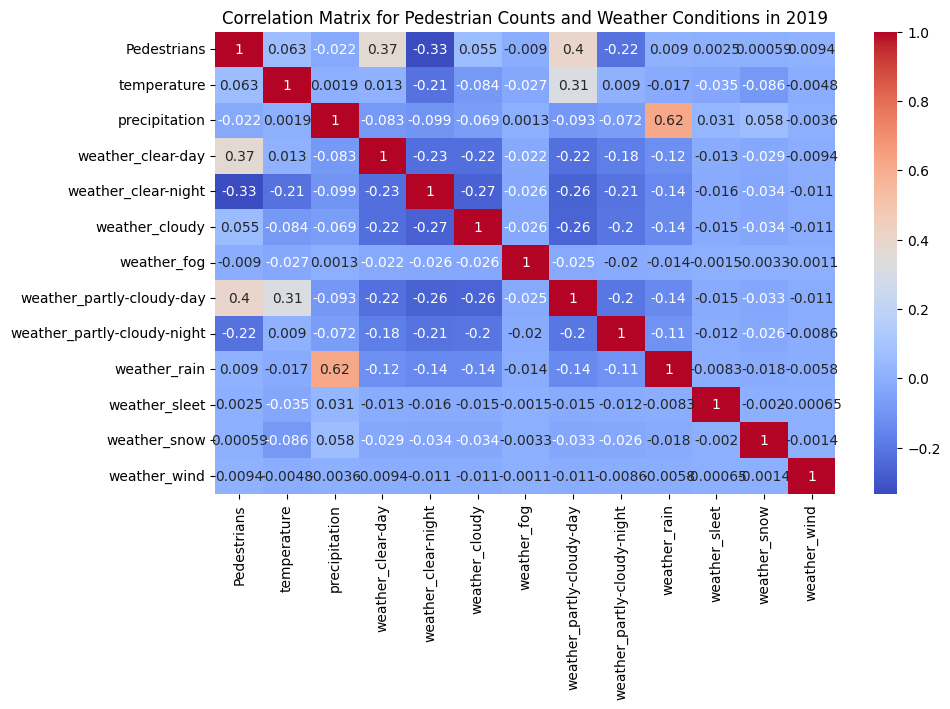

In [92]:
# Track pedestrian counts on the Brooklyn Bridge for the year 2019 and analyze how different weather conditions influence pedestrian activity in that year. 
# Sort the pedestrian count data by weather summary to identify any correlations(with a correlation matrix) between weather patterns and pedestrian counts for the selected year.

df_2019 = df[df['hour_beginning'].dt.year == 2019]

# one-hot encode weather summary
weather_dummies = pd.get_dummies(df_2019['weather_summary'], prefix='weather')
df_2019 = pd.concat([df_2019, weather_dummies], axis=1)

# plot correlation matrix in heatmap
plt.figure(figsize=(10,6))
corr = df_2019[['Pedestrians', 'temperature', 'precipitation']+ list(weather_dummies)].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Pedestrian Counts and Weather Conditions in 2019')
plt.show()

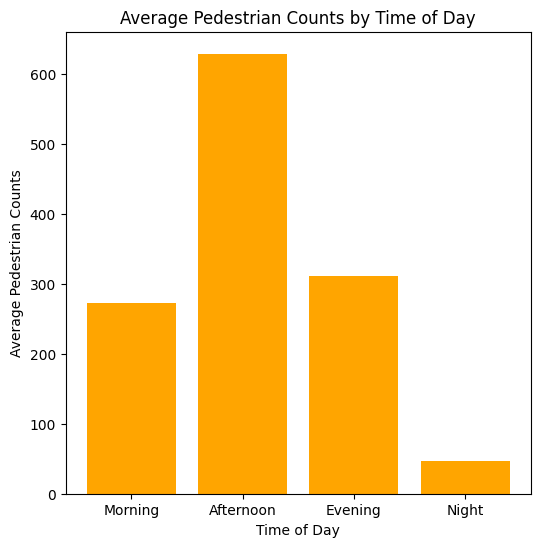

In [83]:
# Implement a custom function to categorize time of day into morning, afternoon, evening, and night, and create a new column in the DataFrame to store these categories. 
def categorize_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'
    
df['time_of_day'] = df['hour'].apply(categorize_time_of_day)
df.head()

# Use this new column to analyze pedestrian activity patterns throughout the day.
time_of_day_counts = df.groupby('time_of_day').agg(average = ('Pedestrians', 'mean')).reindex(['Morning', 'Afternoon', 'Evening', 'Night'])

# plot the bar graph
plt.figure(figsize=(6,6))
plt.bar(time_of_day_counts.index, time_of_day_counts['average'], color='orange')
plt.title('Average Pedestrian Counts by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Pedestrian Counts')
plt.show()